<a href="https://colab.research.google.com/github/abhisekmiitk/ensemble_new/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import zipfile
import pandas as pd

# Unzip the file
with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Load the CSV
df = pd.read_csv("ecom_data.csv")
df.replace
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## EDA Analysis

Shape: (5630, 20)

Columns:
 Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Missing Values:
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmo

<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

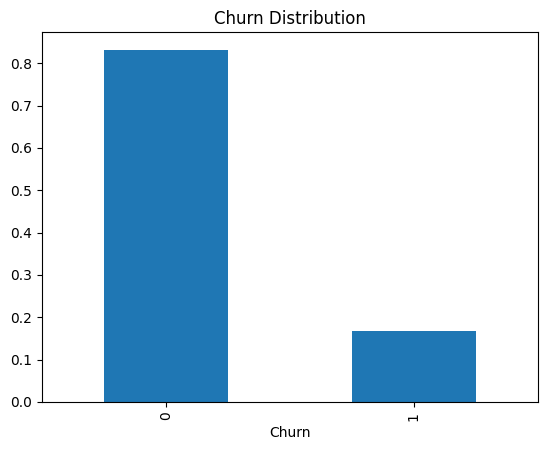

In [4]:
# Shape & columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Null values
print("\nMissing Values:\n", df.isnull().sum())

# Data types
print("\nData Types:\n", df.dtypes)

# Target distribution
df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')


In [5]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,NaN,NaN,NaN,52815.5,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,NaN,NaN,NaN,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,NaN,NaN,NaN,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,NaN,NaN,NaN,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375.0,NaN,NaN,NaN,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,NaN,NaN,NaN,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0


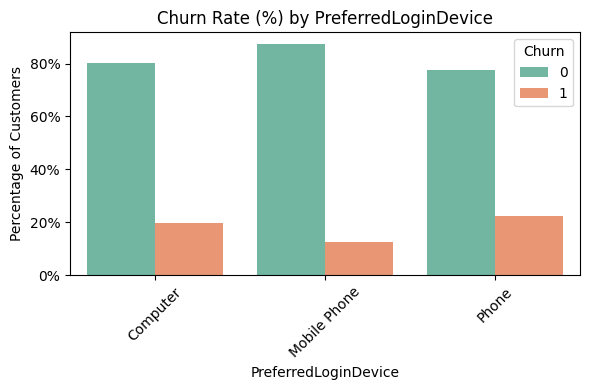

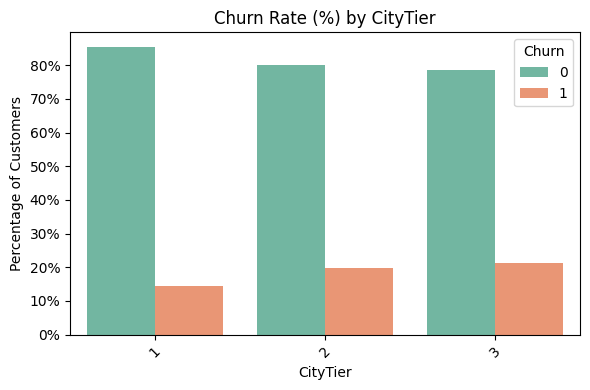

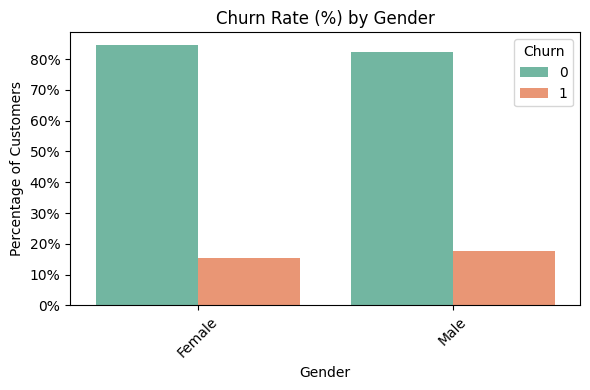

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Categorical features to inspect
categorical_cols = ['PreferredLoginDevice', 'CityTier', 'Gender']

for col in categorical_cols:
    # ── 1. Build a % DataFrame ───────────────────────────────────────────
    pct_df = (
        df.groupby(col)['Churn']
          .value_counts(normalize=True)          # proportions (0–1)
          .rename('Percentage')
          .reset_index()
    )

    # ── 2. Plot ──────────────────────────────────────────────────────────
    plt.figure(figsize=(6, 4))
    sns.barplot(
        data=pct_df,
        x=col,
        y='Percentage',
        hue='Churn',
        palette='Set2'
    )
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.title(f'Churn Rate (%) by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


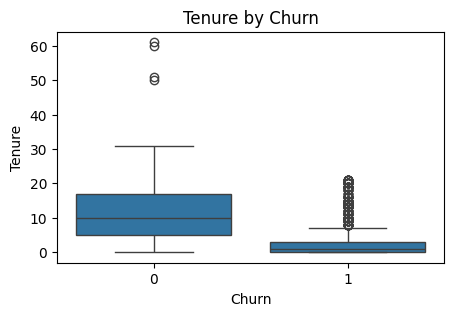

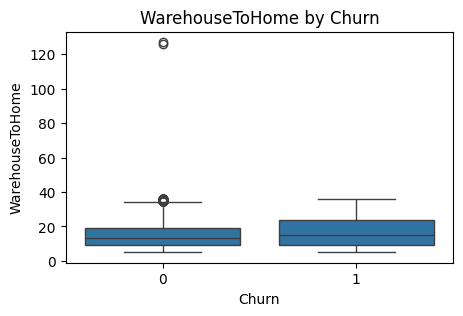

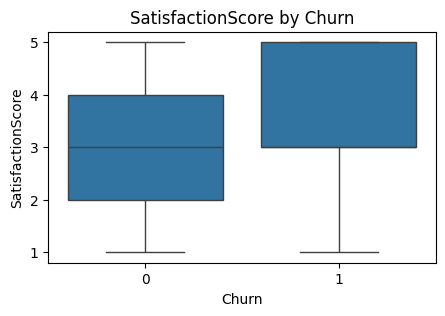

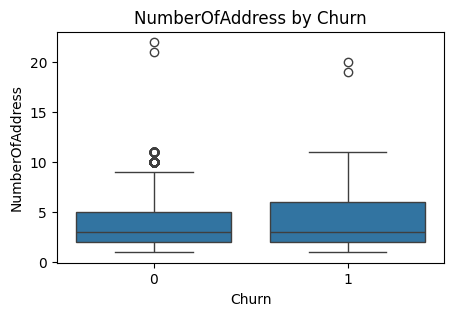

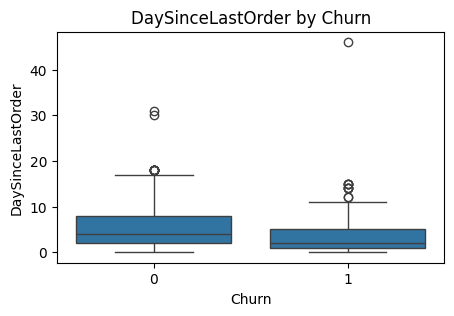

In [7]:
# Churn vs numeric features
numerical_cols = ['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder']
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} by Churn')
    plt.show()


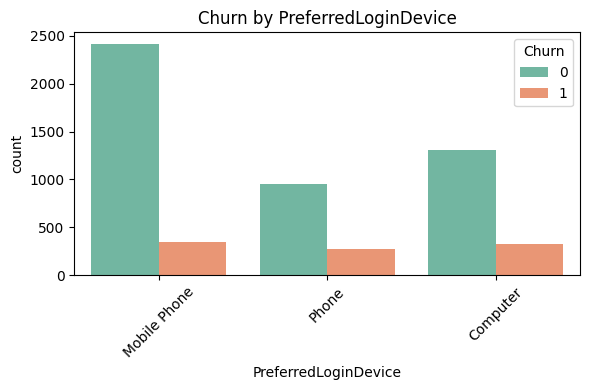

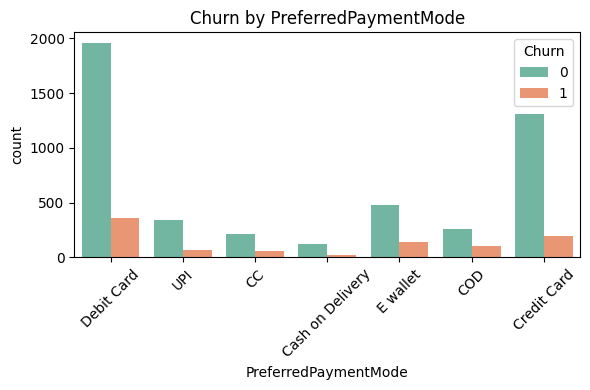

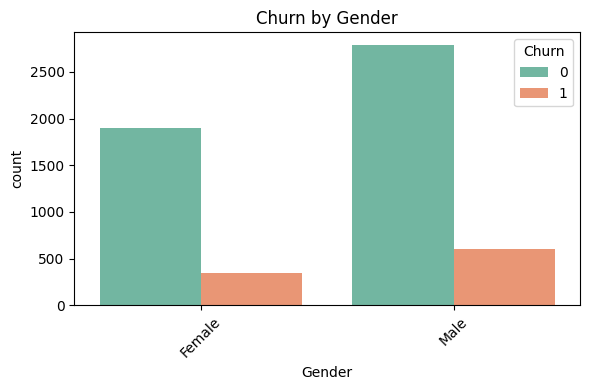

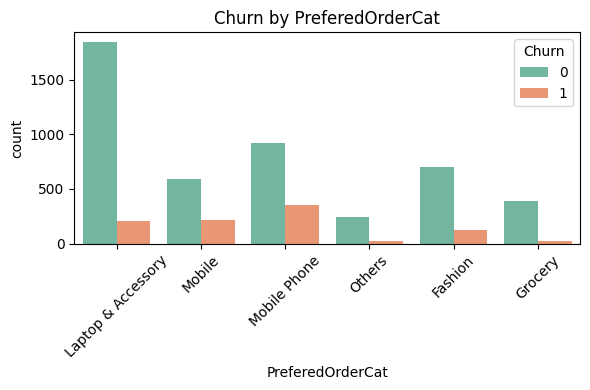

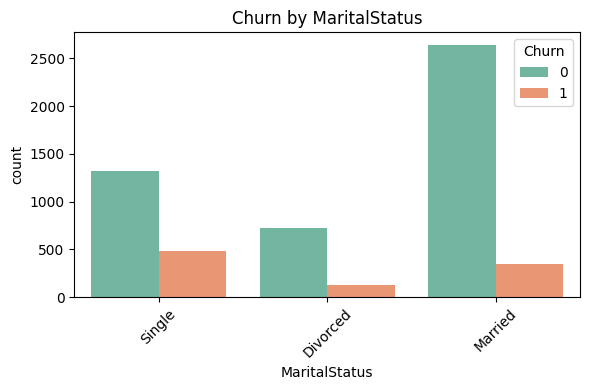

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove target column if included
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Plot Churn distribution for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


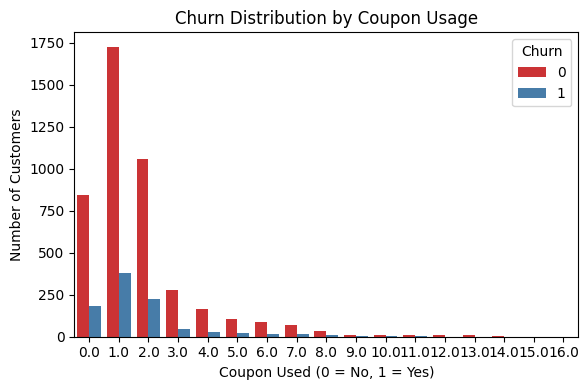

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='CouponUsed', hue='Churn', palette='Set1')
plt.title("Churn Distribution by Coupon Usage")
plt.xlabel("Coupon Used (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

## Modelling

In [11]:
!pip install -q xgboost catboost lightgbm scikit-learn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [26]:
# ---------------------------------------------------------------
# 0. Imports & dataset already loaded into df, X, y as before
# ---------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier          # NEW

# ---------------------------------------------------------------
# 1. Train/test split (same as before)
# ---------------------------------------------------------------

# Remove any rows where the target is missing
df = df.dropna(subset=['Churn'])
print(df.shape)

# Encode target to 0/1 AFTER dropping NaNs
# df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
print(df.shape)
# 1️⃣  Features / target ---------------------------------------------------
X = df.drop('Churn', axis=1)
y = df['Churn']
print(X.head())
print(y.head())


cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()



(5630, 20)
(5630, 20)
   CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001     4.0         Mobile Phone         3              6.0   
1       50002     NaN                Phone         1              8.0   
2       50003     NaN                Phone         1             30.0   
3       50004     0.0                Phone         3             15.0   
4       50005     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Lapt

In [27]:

# 2️⃣  Train-test split ----------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [28]:

# ---------------------------------------------------------------
# 2. Helper for metrics
# ---------------------------------------------------------------
def evaluate(name, y_true, y_pred):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    print(f"{name:<18} | Accuracy: {acc:.3f}  Precision: {prec:.3f}  Recall: {rec:.3f}")


In [29]:

# ---------------------------------------------------------------
# 3. AdaBoost (sklearn)
# ---------------------------------------------------------------
ada = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", AdaBoostClassifier(
        n_estimators=200, learning_rate=0.05, random_state=42))
])
ada.fit(X_train, y_train)
evaluate("AdaBoost", y_test, ada.predict(X_test))


ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

# ---------------------------------------------------------------
# 4. GradientBoosting (sklearn)
# ---------------------------------------------------------------
gb = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42))
])
gb.fit(X_train, y_train)
evaluate("GradientBoosting", y_test, gb.predict(X_test))

# ---------------------------------------------------------------
# 5. XGBoost
# ---------------------------------------------------------------
xgb = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", XGBClassifier(
        n_estimators=400, max_depth=4, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        objective="binary:logistic", eval_metric="logloss",
        random_state=42, use_label_encoder=False))
])
xgb.fit(X_train, y_train)
evaluate("XGBoost", y_test,
         (xgb.predict_proba(X_test)[:, 1] > 0.5).astype(int))

# ---------------------------------------------------------------
# 6. CatBoost (native categoricals)
# ---------------------------------------------------------------
cat_model = CatBoostClassifier(
    iterations=400, depth=6, learning_rate=0.05,
    loss_function="Logloss", eval_metric="AUC",
    verbose=False, random_state=42
)
cat_model.fit(X_train, y_train,
              cat_features=[X.columns.get_loc(c) for c in cat_cols])
evaluate("CatBoost", y_test, cat_model.predict(X_test))

# ---------------------------------------------------------------
# 7. LightGBM  (histogram-based GBDT)  NEW
# ---------------------------------------------------------------
lgbm = Pipeline([
    ("prep", ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ])),
    ("clf", LGBMClassifier(
        n_estimators=400, max_depth=-1, learning_rate=0.05,
        num_leaves=31, subsample=0.8, colsample_bytree=0.8,
        random_state=42))
])
lgbm.fit(X_train, y_train)
evaluate("LightGBM", y_test,
         (lgbm.predict_proba(X_test)[:, 1] > 0.5).astype(int))

In [30]:
df = df.dropna(subset=['Churn'])
# df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 2. One-hot-encode categoricals --------------------------------------------
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
y = df['Churn']

# 3. Train / test split ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. Fit XGBoost -------------------------------------------------------------
xgb_clf = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)
xgb_clf.fit(X_train, y_train)

# 5. Predict & evaluate ------------------------------------------------------
y_pred = (xgb_clf.predict_proba(X_test)[:, 1] > 0.5).astype(int)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:49:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy : 0.935
Precision: 0.884
Recall   : 0.705
